# Nivelatorio II: Estadística para la Ciencia de Datos

## Tutorial en Pyhton - Sesión 4

In [1]:
## Libreria de funciones estadísticas
#pip install pingouin

In [2]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## LIbrería funciones estadísticas

Los datos de la base “lowbwt.xlsx” corresponden al peso de bebés recién nacidos. El objetivo del estudio era determinar las variables asociadas con dar a luz un bebé con bajo peso en gramos (es decir, si BWT < 2500 grams, siendo BWT el peso registrado). Los datos se recolectaron a 189 mujeres, 59 de las cuales dieron a luz bebés con bajo peso. La base cuenta con las siguientes variables:

1. id: Código de identificación
2. low: Identifica si el recien nacido es de bajo peso (1: Sí; 0: No)
3. age: Edad de la madre al momento del parto (1: Blanca; 2: Afro; 3: Otras)
4. lwt: Peso de la madre al momento de su último periodo mestrual
5. race: Etnia de la madre
6. smoke: Identifica si la madre es fumadora (1: sí; 2: No)
7. ptl: Historial de labor prematura
8. ht: Identifica si tiene historial de hipertensión (1: Sí; 2: No)
9. ui: Identifica si la madre tuvo irritabilidad uterina (1: Sí; 2: No)
10. ftv: Número de visitas médicas de control realizadas durante el primer trimestre del embarazo.
11. bwt: Peso del recien nacido

En este tutorial vamos a probar cuatro preguntas de investigacion:
1. Se desea saber si existe relación entre el peso del recién nacido y si la madre es fumadora o no. 
2. Se desea saber si existe relación entre el peso del recién nacido y la raza de la madre. 
3. Se desea saber si existe relación entre el bajo peso al nacer y si la madre es fumadora o no.
4. Se desea saber si existe relación entre el peso del recién nacido y el peso de la madre.

In [3]:
## Cargo los datos
data = pd.read_excel("lowbwt.xlsx")
data

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,4,1,28,120,3,1,1,0,1,0,709
1,10,1,29,130,1,0,0,0,1,2,1021
2,11,1,34,187,2,1,0,1,0,0,1135
3,13,1,25,105,3,0,1,1,0,0,1330
4,15,1,25,85,3,0,0,0,1,0,1474
...,...,...,...,...,...,...,...,...,...,...,...
184,222,0,31,120,1,0,0,0,0,2,4167
185,223,0,35,170,1,0,1,0,0,1,4174
186,224,0,19,120,1,1,0,0,0,0,4238
187,225,0,24,116,1,0,0,0,0,1,4593


# Relación entre una cuantitativa y una cualitativa

In [4]:
## Reemplazo códigos por nombres de categorías
data["smoke"]=data["smoke"].replace(1, "Madre fumadora")
data["smoke"]=data["smoke"].replace(0, "Madre No fumadora")
data

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,4,1,28,120,3,Madre fumadora,1,0,1,0,709
1,10,1,29,130,1,Madre No fumadora,0,0,1,2,1021
2,11,1,34,187,2,Madre fumadora,0,1,0,0,1135
3,13,1,25,105,3,Madre No fumadora,1,1,0,0,1330
4,15,1,25,85,3,Madre No fumadora,0,0,1,0,1474
...,...,...,...,...,...,...,...,...,...,...,...
184,222,0,31,120,1,Madre No fumadora,0,0,0,2,4167
185,223,0,35,170,1,Madre No fumadora,1,0,0,1,4174
186,224,0,19,120,1,Madre fumadora,0,0,0,0,4238
187,225,0,24,116,1,Madre No fumadora,0,0,0,1,4593


Antes de entrar a realizar pruebas, realicemos una exploración gráfica. Esto nos permite darnos una idea de lo que podríamos obtener como resultado en las pruebas estadísticas. En este caso, ¿qué podríamos decir por ahora?

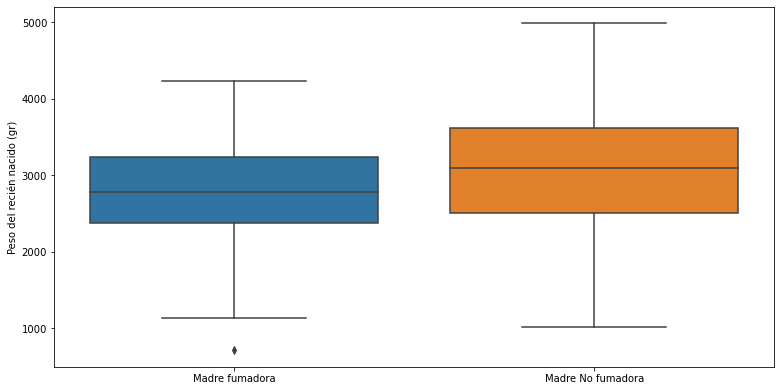

In [5]:
fig_boxplot = plt.figure(figsize=(10,5)) 
ax = fig_boxplot.add_axes([0,0,1,1])
ax=sns.boxplot(x=data["smoke"], y=data["bwt"])
plt.ylabel('Peso del recién nacido (gr)')   
plt.xlabel('')           
plt.show()  

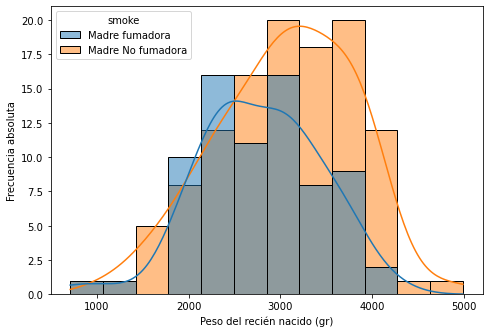

In [6]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=data["bwt"], hue=data["smoke"],kde=True)
plt.ylabel('Frecuencia absoluta')   
plt.xlabel('Peso del recién nacido (gr)') 
plt.show() 

Analizando los gráficos podríamos comentar que pareciera que los recién nacidos de madres NO fumadoras tienen en promedio un mayor peso que los de madres fumadoras. Sin embargo, debemos realizar las pruebas estadísticas correspondientes para validar esto.

# Comparación de medias con dos poblaciones

## Verificación de supuestos:

Verifiquemos primero el de normalidad. El supuesto establece que ambas poblaciones deben seguir la distribución normal o tener un tamaño mayor a 30 para que se cumpla el TLC.  

Recordemos las hipótesis:
- Ho: La muestra proviene de una población que sigue una distribución normal
- Ha: La muestra NO proviene de una población que sigue una distribución normal

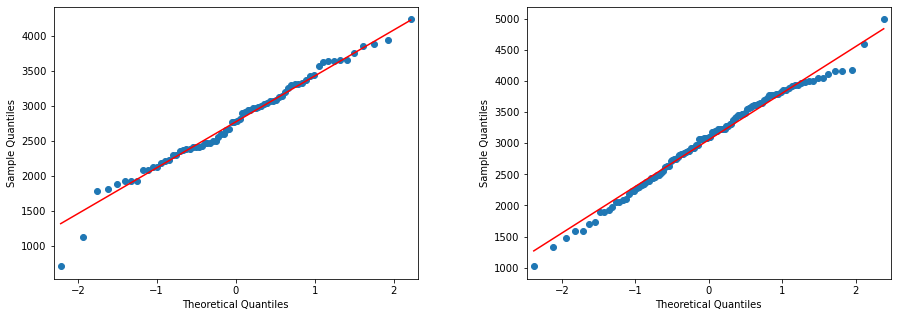

In [7]:
## QQplots
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

ax1=qqplot(data[data["smoke"]=="Madre fumadora"]["bwt"], line='s',ax=axs[0])
ax2=qqplot(data[data["smoke"]=="Madre No fumadora"]["bwt"], line='s',ax=axs[1])
plt.show()

In [8]:
# normalidad
print("Población: Madre fumadora")
Estad,vp = shapiro(data[data["smoke"]=="Madre fumadora"]["bwt"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data[data["smoke"]=="Madre fumadora"]["bwt"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

print("Población: Madre No fumadora")
Estad,vp = shapiro(data[data["smoke"]=="Madre No fumadora"]["bwt"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data[data["smoke"]=="Madre No fumadora"]["bwt"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

Población: Madre fumadora
Estadístico SW= 0.9827704429626465, Valor-p= 0.41028788685798645
Estadístico AD= 0.3097116729573486, Valor crítico (sign. 5%)= 0.75

Población: Madre No fumadora
Estadístico SW= 0.9871007800102234, Valor-p= 0.34354346990585327
Estadístico AD= 0.4950927145899726, Valor crítico (sign. 5%)= 0.762


Conclusión: No es posible rechazar la hipótesis nula, por tanto podemos decir que se cumple el supuesto de normalidad. Noten también que de todas formas, los tamaños de ambas poblaciones era mayor que 30.  

Ahora pasemos al supuesto de homogeneidad de varianzas y recordemos las hipótesis:
- Ho: la varianza en ambas poblaciones es igual
- Ha: la varianza difiere entre poblaciones


In [9]:
# Homogeneidad de varianzas (Prueba F)
def f_test(group1, group2):
    stat = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    df_num = group1.size-1
    df_den = group2.size-1
    p_value = np.where(stat<1,2*f.cdf(stat, df_num, df_den),2*(1-f.cdf(stat, df_num, df_den)))
    return stat,p_value

Estad,vp=f_test(data[data["smoke"]=="Madre fumadora"]["bwt"], data[data["smoke"]=="Madre No fumadora"]["bwt"])
print(f'Estadístico F= {Estad}, Valor-p= {vp}')

Estadístico F= 0.7696243711493685, Valor-p= 0.2289621285737571


Conclusión: No es posible rechazar la hipótesis nula, por tanto podemos decir que se cumple el supuesto de homogeneidad de varianzas.

Con esta prueba es suficiente, pero quiero mostrar cómo se haría la prueba de Levene:

In [10]:
Estad,vp=levene(data[data["smoke"]=="Madre fumadora"]["bwt"], 
                data[data["smoke"]=="Madre No fumadora"]["bwt"],
               center='mean')
print(f'Estadístico W= {Estad}, Valor-p= {vp}')

Estadístico W= 1.507983797115636, Valor-p= 0.22099041242970063


LLegamos a la misma conclusión que con la Prueba F.

## Prueba t

Habiendo comprobado que se cumplen los supuestos de normalidad y homogeneidad de varianza, podemos realizar la **prueba t conjunta**. Recordemos las hipótesis:

- Ho: la media en ambas poblaciones es igual
- Ha: la media difiere entre poblaciones


In [11]:
Estad,vp=ttest_ind(data[data["smoke"]=="Madre fumadora"]["bwt"], 
                   data[data["smoke"]=="Madre No fumadora"]["bwt"])

print(f'Media grupo 1:{round(data[data["smoke"]=="Madre fumadora"]["bwt"].mean(),2)}, Media grupo 2:{round(data[data["smoke"]=="Madre No fumadora"]["bwt"].mean(),2)}, Estadístico t= {Estad}, Valor-p= {vp}')

Media grupo 1:2773.24, Media grupo 2:3054.96, Estadístico t= -2.6336039163601987, Valor-p= 0.009155660031636731


Conclusión: Rechazo la hipótesis nula, por tanto con un 95% de confianza (incluso un 99%) podemos afirmar que la media del peso del recién nacido difiere entre bebés de madres fumadoras y de madres no fumadoras (2773 gr vs 3055 gr).

Supongamos que hay normalidad, pero no se cumple el supuesto de homogeneidad de varianzas. Entonces se realiza la **prueba t para varianzas desiguales**:

In [12]:
Estad,vp=ttest_ind(data[data["smoke"]=="Madre fumadora"]["bwt"], 
                   data[data["smoke"]=="Madre No fumadora"]["bwt"],
                   equal_var=False)

print(f'Media grupo 1:{round(data[data["smoke"]=="Madre fumadora"]["bwt"].mean(),2)}, Media grupo 2:{round(data[data["smoke"]=="Madre No fumadora"]["bwt"].mean(),2)}, Estadístico t= {Estad}, Valor-p= {vp}')

Media grupo 1:2773.24, Media grupo 2:3054.96, Estadístico t= -2.7094574546176937, Valor-p= 0.007429656670110683


Ahora supongamos que no hay normalidad y por tanto debemos realizar la prueba no paramétrica de **Mann-Whitney-Wilcoxon**:

In [13]:
Estad,vp=mannwhitneyu(data[data["smoke"]=="Madre fumadora"]["bwt"], 
                   data[data["smoke"]=="Madre No fumadora"]["bwt"])

print(f'Estadístico W= {Estad}, Valor-p= {vp}')

Estadístico W= 3266.5, Valor-p= 0.00710906665852587


# Comparación de medias con dos o más poblaciones

Ahora pensemos si existe relación entre el peso del recién nacido y la etnia de la madre. Es decir, ¿existe diferencia en el peso del recién nacido entre etnias?

In [14]:
## Reemplazo códigos por nombres de categorías
data["race"]=data["race"].replace(1, "Blanca")
data["race"]=data["race"].replace(2, "Afro")
data["race"]=data["race"].replace(3, "Otras")
data

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,4,1,28,120,Otras,Madre fumadora,1,0,1,0,709
1,10,1,29,130,Blanca,Madre No fumadora,0,0,1,2,1021
2,11,1,34,187,Afro,Madre fumadora,0,1,0,0,1135
3,13,1,25,105,Otras,Madre No fumadora,1,1,0,0,1330
4,15,1,25,85,Otras,Madre No fumadora,0,0,1,0,1474
...,...,...,...,...,...,...,...,...,...,...,...
184,222,0,31,120,Blanca,Madre No fumadora,0,0,0,2,4167
185,223,0,35,170,Blanca,Madre No fumadora,1,0,0,1,4174
186,224,0,19,120,Blanca,Madre fumadora,0,0,0,0,4238
187,225,0,24,116,Blanca,Madre No fumadora,0,0,0,1,4593


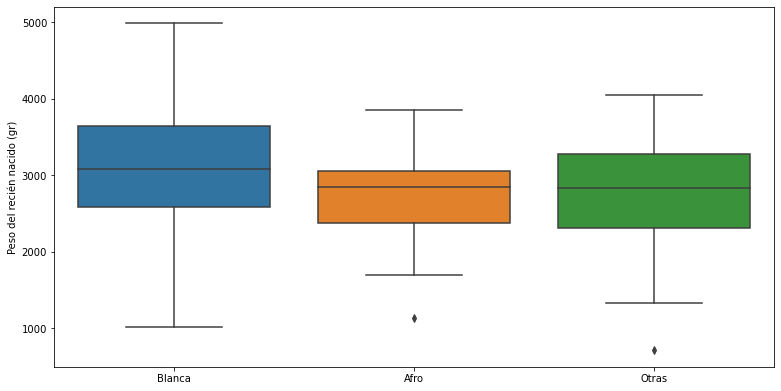

In [15]:
fig_boxplot = plt.figure(figsize=(10,5)) 
ax = fig_boxplot.add_axes([0,0,1,1])

resumen=data.groupby(by=["race"])["bwt"].describe()

ax=sns.boxplot(x=data["race"], y=data["bwt"],order=resumen.sort_values(by='50%', ascending=False).index)
plt.ylabel('Peso del recién nacido (gr)')   
plt.xlabel('')           
plt.show() 

Analizando la gráfica podríamos comentar que pareciera que los recién nacidos de madres de raza blanca tienen en promedio un mayor peso que los de otras razas.

## Validación de los supuestos

In [16]:
# Normalidad
print("Población: Raza Blanca")
Estad,vp = shapiro(data[data["race"]=="Blanca"]["bwt"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
print("Población: Raza Afro")
Estad,vp = shapiro(data[data["race"]=="Afro"]["bwt"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
print("Población: Otras razas")
Estad,vp = shapiro(data[data["race"]=="Otras"]["bwt"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')

Población: Raza Blanca
Estadístico SW= 0.9872750043869019, Valor-p= 0.48643404245376587
Población: Raza Afro
Estadístico SW= 0.9769612550735474, Valor-p= 0.803802490234375
Población: Otras razas
Estadístico SW= 0.975471556186676, Valor-p= 0.20706778764724731


In [17]:
# Homogeneidad de varianzas
Estad,vp=levene(data[data["race"]=="Blanca"]["bwt"],
               data[data["race"]=="Afro"]["bwt"],
               data[data["race"]=="Otras"]["bwt"],
               center='mean')
print(f'Estadístico W= {Estad}, Valor-p= {vp}')

Estadístico W= 0.43682024875871084, Valor-p= 0.6467486280402357


## Prueba ANOVA

Se cumplen ambos supuestos. Por tanto, podemos hacer la prueba ANOVA. Recordemos las hipótesis:
- Ho: la media en todas las poblaciones es igual
- Ha: la media de al menos una población es diferente


In [18]:
# Prueba ANOVA (libreria stats)
Estad,vp=f_oneway(data[data["race"]=="Blanca"]["bwt"],
               data[data["race"]=="Afro"]["bwt"],
               data[data["race"]=="Otras"]["bwt"])
print(f'Estadístico F= {Estad}, Valor-p= {vp}')

Estadístico F= 4.9718944104484235, Valor-p= 0.007879055861064493


In [19]:
# Prueba ANOVA (con la libreria pingouin)
aov = pg.anova(dv='bwt', between='race', data=data,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,race,5.070608e+06,2,2.535304e+06,4.971894,0.007879,0.050748
1,Within,9.484645e+07,186,5.099271e+05,NaN,NaN,NaN


Conclusión: Rechazo la hipótesis nula, por tanto con un 95% de confianza (incluso con un 99%) podemos afirmar que al menos una de las medias es diferente. Pero entonces, ¿cuáles son diferentes?

In [20]:
# Prueba HSD Tukey
pg.pairwise_tukey(data=data, dv='bwt', between='race')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Afro,Blanca,2719.692308,3103.739583,-384.047276,157.874389,-2.432613,0.041962,-0.537452
1,Afro,Otras,2719.692308,2804.014925,-84.322618,164.995255,-0.511061,0.866055,-0.119538
2,Blanca,Otras,3103.739583,2804.014925,299.724658,113.677586,2.636621,0.024529,0.411429


Conclusión: Con un 95% podemos afirmar que existe diferencia en el peso del recien nacido entre raza Blanca y Afro y Blanca y Otras, pero no entre raza Afro y Otras.

Supongamos que hay normalidad, pero no se cumple el supuesto de homogeneidad de varianzas. Entonces se realiza la **prueba ANOVA de Welch**:

In [21]:
# Prueba ANOVA de Welch
aov = pg.welch_anova(dv='bwt', between='race',data=data)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,race,2,72.417035,5.11573,0.008353,0.050748


In [22]:
# ¿Cuáles son diferentes?
pg.pairwise_gameshowell(data=data, dv='bwt',between='race')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Afro,Blanca,2719.692308,3103.739583,-384.047276,145.621442,-2.637299,44.232310,0.030291,-0.537452
1,Afro,Otras,2719.692308,2804.014925,-84.322618,153.148369,-0.550594,51.127485,0.846636,-0.119538
2,Blanca,Otras,3103.739583,2804.014925,299.724658,115.246644,2.600724,142.958234,0.027590,0.411429


Ahora supongamos que no hay normalidad y por tanto debemos realizar la prueba no paramétrica de **Kruskal-Wallis**:

In [23]:
# Prueba Kruskal-Wallis
pg.kruskal(data=data, dv='bwt', between='race')

,Source,ddof1,H,p-unc
Kruskal,race,2,8.590907,0.01363


In [24]:
# Prueba de Wilcoxon para comparación por parejas
pg.pairwise_tests(dv='bwt', between='race', data=data, parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,race,Afro,Blanca,False,False,861.0,two-sided,0.015666,-0.537452
1,race,Afro,Otras,False,False,800.0,two-sided,0.546122,-0.119538
2,race,Blanca,Otras,False,False,3902.0,two-sided,0.020768,0.411429


# Relación entre dos cualitativas

Supongamos ahora que en vez de usar la variable cuantitativa peso, usamos la variable cualitativa bajo peso. Analicemos entonces si existe relación entre bajo peso y madres fumadoras/no fumadoras.

In [25]:
## Reemplazo códigos por nombres de categorías
data["low"]=data["low"].replace(1, "Bajo Peso")
data["low"]=data["low"].replace(0, "Normal")

In [26]:
tabla_frec=pd.crosstab(index=data["smoke"],columns=data["low"],normalize="index").reset_index()
tabla_frec

low,smoke,Bajo Peso,Normal
0,Madre No fumadora,0.252174,0.747826
1,Madre fumadora,0.405405,0.594595


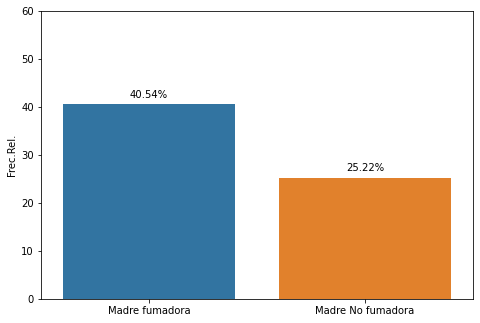

In [27]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=tabla_frec["smoke"],y=tabla_frec["Bajo Peso"]*100,order=tabla_frec.sort_values(by='Normal')["smoke"]) 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%', padding=5)   
ax.set(ylim=(0, 60))
plt.ylabel('Frec.Rel.')  
plt.xlabel('')         
plt.show()

Analizando la gráfica, podríamos comentar que recien nacidos con bajo peso es más frecuente en bebés de madres fumadoras que de no fumadoras.

## Prueba de Chi Cuadrado de independencia

Recordemos las hipótesis:

- Ho: No existe relación entre las variables
- Ha: Existe relación entre las variables

In [28]:
tabla_frec_abs=pd.crosstab(index=data["smoke"],columns=data["low"])
Estad,vp,gl,frec_esp=chi2_contingency(tabla_frec_abs)
print(f'Estadístico X^2= {Estad}, Valor-p= {vp}')

Estadístico X^2= 4.235928545602458, Valor-p= 0.03957696932523245


Conclusión: Rechazo la hipótesis nula, por tanto podríamos afirmar con un 95% de confianza que existe relación entre el bajo peso y si la madre es fumadora o no.

# Relación entre dos cuantitativas

Se desea saber si existe relación entre el peso del recién nacido y el peso de la madre. Exploremos la posible relación graficamente:

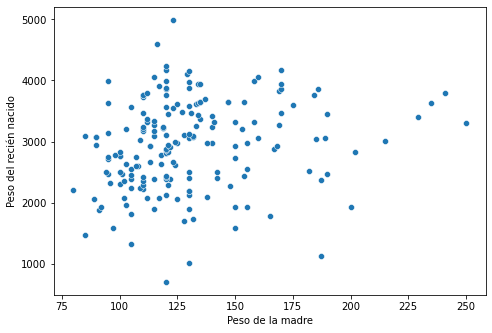

In [29]:
# DIagrama de dispersión
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.scatterplot(x=data["lwt"],y=data["bwt"])   
plt.ylabel('Peso del recién nacido')  
plt.xlabel('Peso de la madre')         
plt.show()

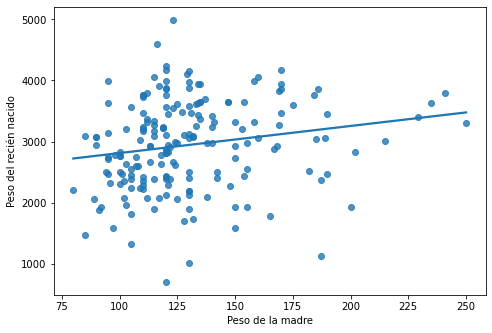

In [30]:
# Diagrama de dispersión con línea de tendencia
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data["lwt"],y=data["bwt"],ci=None)   
plt.ylabel('Peso del recién nacido')  
plt.xlabel('Peso de la madre')         
plt.show()

Graficamente pareciera que no hay una relación fuerte entre las variables. Veamos que dice el coeficiente de Pearson y su significancia estadística:

In [31]:
Coef,vp=pearsonr(data["lwt"],data["bwt"])
print(f'Coeficiente de correlación= {Coef}, Valor-p= {vp}')

Coeficiente de correlación= 0.18578870880181358, Valor-p= 0.010480719288093457


Recordemos las hipótesis de la prueba:
- Ho: No hay correlación entre las variables (𝜌=0)
- Ha: Existe correlación entre las variables (𝜌≠0)

En tal sentido, podemos rechazar la hipótesis nula. Por tanto, con una confianza del 95% podemos afirmar que la correlación entre las variables existe. Sin embargo, siendo una correlación de 0.18, podríamos decir que es débil.